In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

C:\Users\Admin\anaconda3\envs\A\lib\site-packages\scipy\__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.4
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [2]:
df = pd.read_csv('quora.csv')
df.sample(5)

,id,qid1,qid2,question1,question2,is_duplicate
158001,158001,246909,246910,What are the best free WordPress plugins in 2014?,What is the best FREE WordPress plugin for adv...,0
116013,116013,189071,189072,How do you overcome workplace stress?,How do you reduce workplace stress?,1
233131,233131,333786,343304,How do I deactivate the bsnl hungama plan?,How do I deactivate BSNL hungama?,1
60805,60805,106280,106281,What is escape velocity?,What is a escape velocity and how is it calcul...,1
10298,10298,10147,14660,Is it possible to get out of the friend zone?,Is it possible to get out of friendzoned?,1


In [3]:
df.shape

(404290, 6)

In [4]:
new_df = df.sample(30000,random_state=2)
new_df.isnull().sum()

id              0
qid1            0
qid2            0
question1       0
question2       0
is_duplicate    0
dtype: int64

In [5]:
new_df.head()

,id,qid1,qid2,question1,question2,is_duplicate
398782,398782,496695,532029,What is the best marketing automation tool for...,What is the best marketing automation tool for...,1
115086,115086,187729,187730,I am poor but I want to invest. What should I do?,I am quite poor and I want to be very rich. Wh...,0
327711,327711,454161,454162,I am from India and live abroad. I met a guy f...,T.I.E.T to Thapar University to Thapar Univers...,0
367788,367788,498109,491396,Why do so many people in the U.S. hate the sou...,My boyfriend doesnt feel guilty when he hurts ...,0
151235,151235,237843,50930,Consequences of Bhopal gas tragedy?,What was the reason behind the Bhopal gas trag...,0


In [6]:
new_df.isnull().sum()

id              0
qid1            0
qid2            0
question1       0
question2       0
is_duplicate    0
dtype: int64

0    19013
1    10987
Name: is_duplicate, dtype: int64
0    63.376667
1    36.623333
Name: is_duplicate, dtype: float64


<AxesSubplot:>

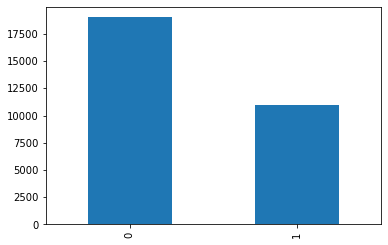

In [7]:
# Distribution of duplicate and non-duplicate questions

print(new_df['is_duplicate'].value_counts())
print((new_df['is_duplicate'].value_counts()/new_df['is_duplicate'].count())*100)
new_df['is_duplicate'].value_counts().plot(kind='bar')

In [8]:
# Repeated questions

qid = pd.Series(new_df['qid1'].tolist() + new_df['qid2'].tolist())
print('Number of unique questions',np.unique(qid).shape[0])
x = qid.value_counts()>1
print('Number of questions getting repeated',x[x].shape[0])

Number of unique questions 55299
Number of questions getting repeated 3480


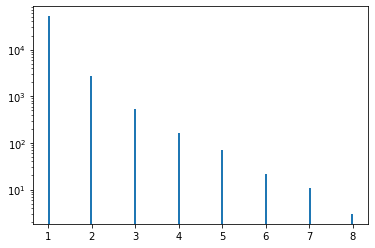

In [9]:
# Repeated questions histogram

plt.hist(qid.value_counts().values,bins=160)
plt.yscale('log')
plt.show()

## Feature Engineering with Basic Features

#### Creation of Basic Features

In [10]:
# 1 - Length of questions
new_df['q1_len'] = new_df['question1'].str.len() 
new_df['q2_len'] = new_df['question2'].str.len()

new_df.head(2)

,id,qid1,qid2,question1,question2,is_duplicate,q1_len,q2_len
398782,398782,496695,532029,What is the best marketing automation tool for...,What is the best marketing automation tool for...,1,76,77
115086,115086,187729,187730,I am poor but I want to invest. What should I do?,I am quite poor and I want to be very rich. Wh...,0,49,57


minimum characters 2
maximum characters 391
average num of characters 59


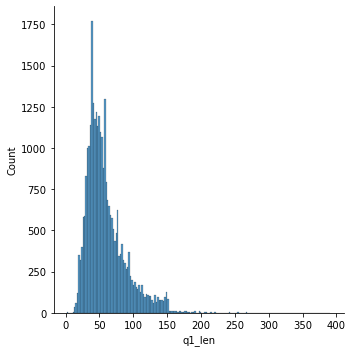

In [11]:
# Analysis of Feature - Length of questions
sns.displot(new_df['q1_len'])
print('minimum characters',new_df['q1_len'].min())
print('maximum characters',new_df['q1_len'].max())
print('average num of characters',int(new_df['q1_len'].mean()))


minimum characters 6
maximum characters 1151
average num of characters 60


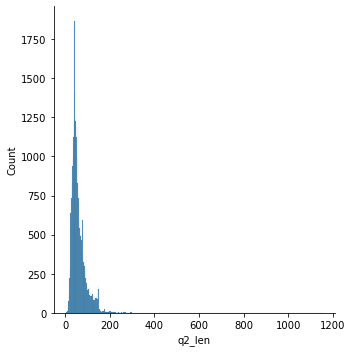

In [12]:
sns.displot(new_df['q2_len'])
print('minimum characters',new_df['q2_len'].min())
print('maximum characters',new_df['q2_len'].max())
print('average num of characters',int(new_df['q2_len'].mean()))

In [13]:
# 2 - Number of words
new_df['q1_num_words'] = new_df['question1'].apply(lambda row: len(row.split(" ")))
new_df['q2_num_words'] = new_df['question2'].apply(lambda row: len(row.split(" ")))

new_df.head(2)

,id,qid1,qid2,question1,question2,is_duplicate,q1_len,q2_len,q1_num_words,q2_num_words
398782,398782,496695,532029,What is the best marketing automation tool for...,What is the best marketing automation tool for...,1,76,77,12,12
115086,115086,187729,187730,I am poor but I want to invest. What should I do?,I am quite poor and I want to be very rich. Wh...,0,49,57,12,15


In [14]:
f = lambda x: x.split(" ")

In [15]:
f('I am a data sceintist')

['I', 'am', 'a', 'data', 'sceintist']

In [16]:
f = lambda x: len(x.split(" "))

In [17]:
f('I am a data scientist')

5

In [18]:
f1 = lambda word: word.lower().strip()

In [19]:
f1('     What is the best marketing automation tool for    ')

'what is the best marketing automation tool for'

minimum words 1
maximum words 72
average num of words 10


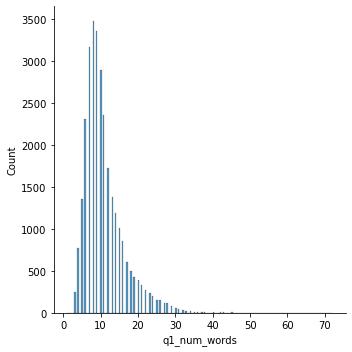

In [20]:
# Analysis of Feature - Number of words
sns.displot(new_df['q1_num_words'])
print('minimum words',new_df['q1_num_words'].min())
print('maximum words',new_df['q1_num_words'].max())
print('average num of words',int(new_df['q1_num_words'].mean()))

minimum words 1
maximum words 237
average num of words 11


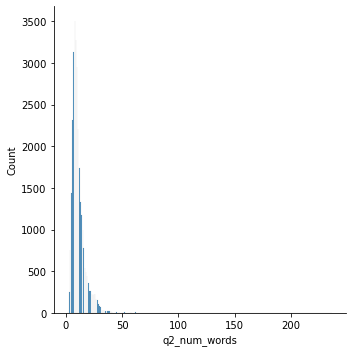

In [21]:
sns.displot(new_df['q2_num_words'])
print('minimum words',new_df['q2_num_words'].min())
print('maximum words',new_df['q2_num_words'].max())
print('average num of words',int(new_df['q2_num_words'].mean()))

In [22]:
# 3 - Common Words

def common_words(row):
    w1 = set(map(lambda word: word.lower().strip(), row['question1'].split(" "))) # Extracting unique words from question1
    w2 = set(map(lambda word: word.lower().strip(), row['question2'].split(" "))) # Extracting unique words from question2 
    return len(w1 & w2) # Applying intersection of unique words from both questions 

In [23]:
new_df['word_common'] = new_df.apply(common_words, axis=1)
new_df.head(2)

,id,qid1,qid2,question1,question2,is_duplicate,q1_len,q2_len,q1_num_words,q2_num_words,word_common
398782,398782,496695,532029,What is the best marketing automation tool for...,What is the best marketing automation tool for...,1,76,77,12,12,11
115086,115086,187729,187730,I am poor but I want to invest. What should I do?,I am quite poor and I want to be very rich. Wh...,0,49,57,12,15,7


In [24]:
numbers = [10,20,30]
result = map(lambda x: x*2, numbers)
print(list(result))

[20, 40, 60]


In [25]:
fruits = ['orange','apple']
result = map(lambda x: x.upper(), fruits)
print(set(result))

{'ORANGE', 'APPLE'}


In [26]:
set(map(lambda word: word.lower().strip(), 'I am poor but I want to invest. What should I do?'	.split(" ")))

{'am', 'but', 'do?', 'i', 'invest.', 'poor', 'should', 'to', 'want', 'what'}

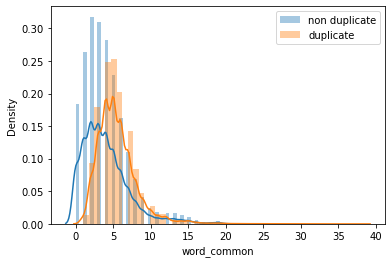

In [27]:
# Analysis of Feature - Common words
sns.distplot(new_df[new_df['is_duplicate'] == 0]['word_common'],label='non duplicate') # Number of common words where there is no duplicate
sns.distplot(new_df[new_df['is_duplicate'] == 1]['word_common'],label='duplicate')  # Number of common words where there is duplicate
plt.legend()
plt.show()

<b> The observation shows that if there are common words in range 2 to 8, then duplicate questions are more

In [28]:
# 4 - Total words

def total_words(row):
    w1 = set(map(lambda word: word.lower().strip(), row['question1'].split(" ")))
    w2 = set(map(lambda word: word.lower().strip(), row['question2'].split(" ")))    
    return (len(w1) + len(w2))

In [29]:
new_df['word_total'] = new_df.apply(total_words, axis=1)
new_df.head(2)

,id,qid1,qid2,question1,question2,is_duplicate,q1_len,q2_len,q1_num_words,q2_num_words,word_common,word_total
398782,398782,496695,532029,What is the best marketing automation tool for...,What is the best marketing automation tool for...,1,76,77,12,12,11,24
115086,115086,187729,187730,I am poor but I want to invest. What should I do?,I am quite poor and I want to be very rich. Wh...,0,49,57,12,15,7,23


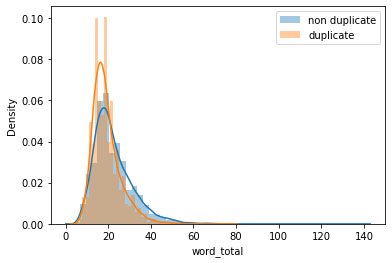

In [30]:
# Analysis of Feature - Total words
sns.distplot(new_df[new_df['is_duplicate'] == 0]['word_total'],label='non duplicate')
sns.distplot(new_df[new_df['is_duplicate'] == 1]['word_total'],label='duplicate')
plt.legend()
plt.show()

<b> The observation shows that if total words are around 16 - 18, then there are more duplicate questions

In [31]:
# 5 - Word share

new_df['word_share'] = round(new_df['word_common']/new_df['word_total'],2)
new_df.head(2)

,id,qid1,qid2,question1,question2,is_duplicate,q1_len,q2_len,q1_num_words,q2_num_words,word_common,word_total,word_share
398782,398782,496695,532029,What is the best marketing automation tool for...,What is the best marketing automation tool for...,1,76,77,12,12,11,24,0.46
115086,115086,187729,187730,I am poor but I want to invest. What should I do?,I am quite poor and I want to be very rich. Wh...,0,49,57,12,15,7,23,0.30


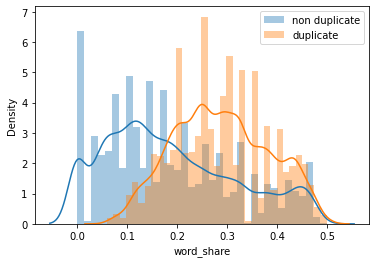

In [32]:
# Analysis of Feature - Word share
sns.distplot(new_df[new_df['is_duplicate'] == 0]['word_share'],label='non duplicate')
sns.distplot(new_df[new_df['is_duplicate'] == 1]['word_share'],label='duplicate')
plt.legend()
plt.show()

In [33]:
# 6 - Frquency of Question id's
new_df['freq_qid1']=new_df.groupby('qid1')['qid1'].transform('count')
new_df['freq_qid2']=new_df.groupby('qid2')['qid2'].transform('count')

In [34]:
# 7 - Frquency q1 +  Frquency q2
new_df['freq_q1+q2']= new_df['freq_qid1'] + new_df['freq_qid2']

In [ ]:
# 7 - Frquency q1 -  Frquency q2
new_df['freq_q1-q2']= new_df['freq_qid1'] - new_df['freq_qid2']

In [36]:
new_df.head(5)

,id,qid1,qid2,question1,question2,is_duplicate,q1_len,q2_len,q1_num_words,q2_num_words,word_common,word_total,word_share,freq_qid1,freq_qid2,freq_q1+q2,freq_q1-q2
398782,398782,496695,532029,What is the best marketing automation tool for...,What is the best marketing automation tool for...,1,76,77,12,12,11,24,0.46,1,1,2,0
115086,115086,187729,187730,I am poor but I want to invest. What should I do?,I am quite poor and I want to be very rich. Wh...,0,49,57,12,15,7,23,0.30,1,1,2,0
327711,327711,454161,454162,I am from India and live abroad. I met a guy f...,T.I.E.T to Thapar University to Thapar Univers...,0,105,120,25,17,2,34,0.06,1,1,2,0
367788,367788,498109,491396,Why do so many people in the U.S. hate the sou...,My boyfriend doesnt feel guilty when he hurts ...,0,59,146,12,30,0,32,0.00,1,1,2,0
151235,151235,237843,50930,Consequences of Bhopal gas tragedy?,What was the reason behind the Bhopal gas trag...,0,35,50,5,9,3,13,0.23,1,1,2,0


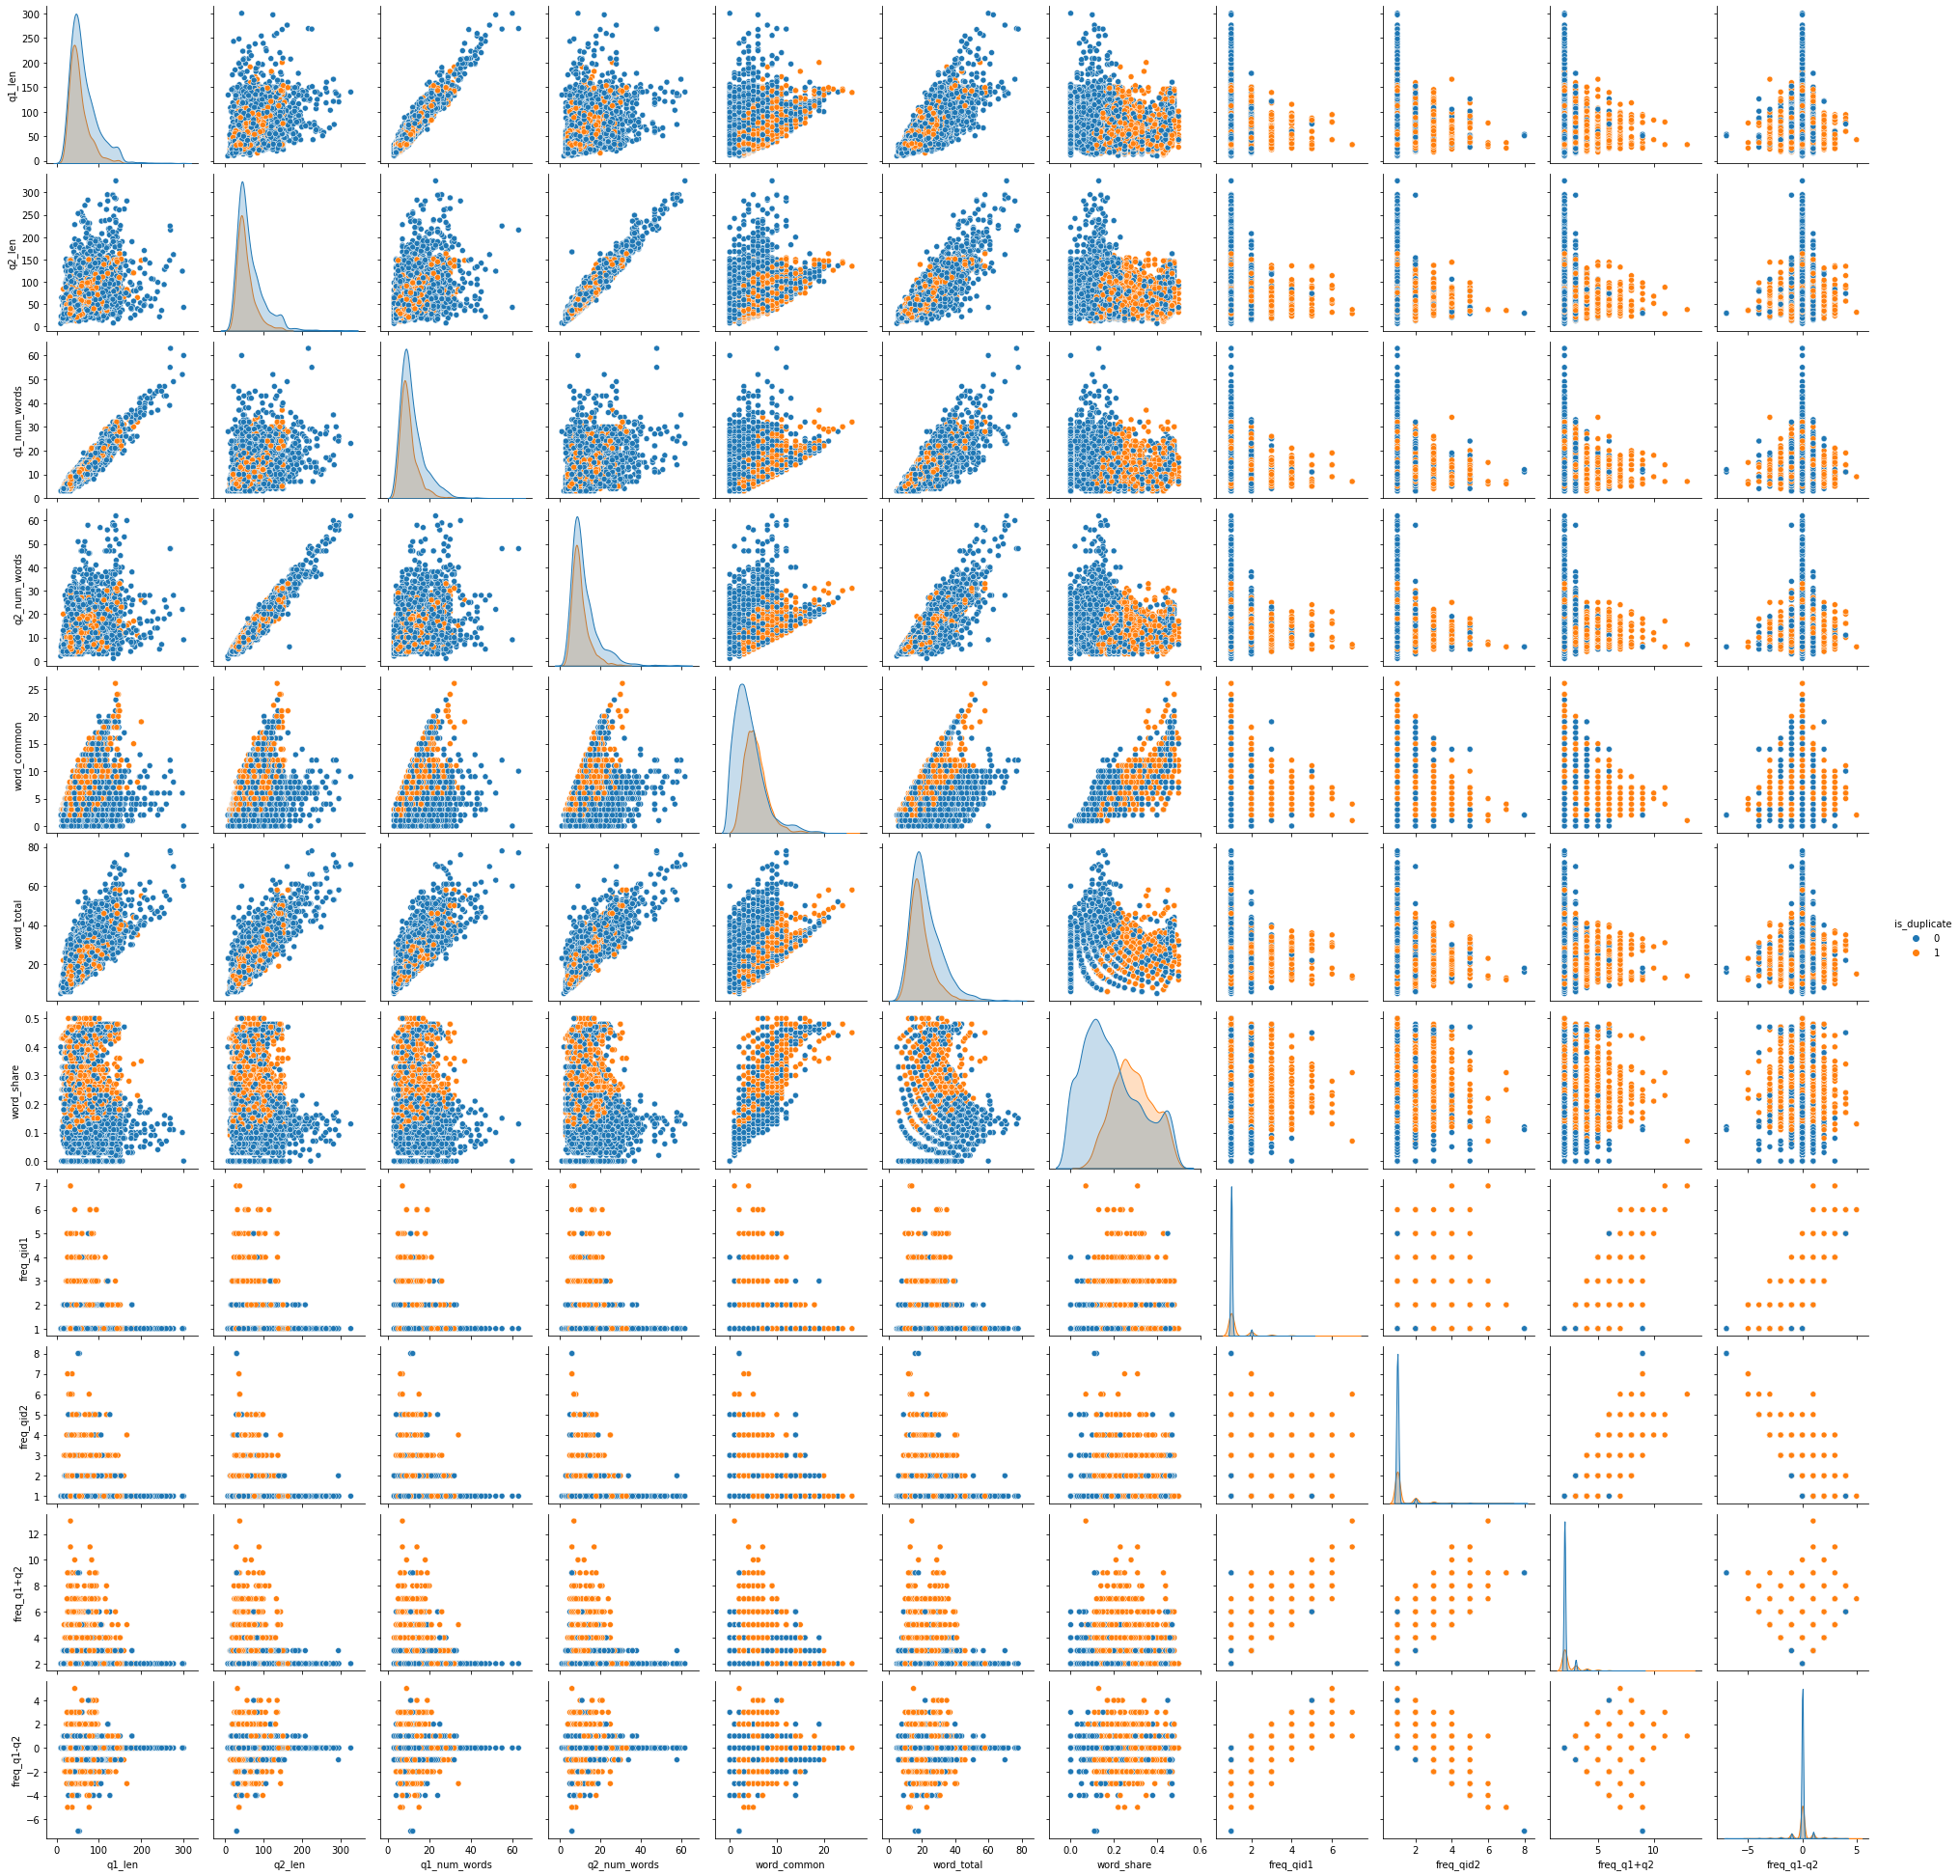

In [38]:
n = 10000
sns.pairplot(new_df[['q1_len', 'q2_len', 'q1_num_words', 'q2_num_words','word_common','word_total','word_share','freq_qid1','freq_qid2','freq_q1+q2','freq_q1-q2', 'is_duplicate']][0:n], hue='is_duplicate')

#### Visualization by groupby 'is_duplicate'

In [ ]:
# to create group by 'is_duplicate'
g = new_df.groupby('is_duplicate')

In [ ]:
g.get_group(0).head(2) # to get dataframe for is_duplicate = 0

In [ ]:
g.max() # getting max for all values

In [ ]:
g.describe()

In [ ]:
g.plot()

In [ ]:
new_df.groupby("is_duplicate")['id'].count().plot.bar()

## Feature Vectorization

In [49]:
ques_df = new_df[['question1','question2']]
ques_df.head()

,question1,question2
398782,What is the best marketing automation tool for...,What is the best marketing automation tool for...
115086,I am poor but I want to invest. What should I do?,I am quite poor and I want to be very rich. Wh...
327711,I am from India and live abroad. I met a guy f...,T.I.E.T to Thapar University to Thapar Univers...
367788,Why do so many people in the U.S. hate the sou...,My boyfriend doesnt feel guilty when he hurts ...
151235,Consequences of Bhopal gas tragedy?,What was the reason behind the Bhopal gas trag...


#### Bag of Words

In [52]:

from sklearn.feature_extraction.text import CountVectorizer
# merge texts
questions = list(ques_df['question1']) + list(ques_df['question2'])

cv = CountVectorizer(max_features=3000)
q1_arr, q2_arr = np.vsplit(cv.fit_transform(questions).toarray(),2)

In [53]:
temp_df1 = pd.DataFrame(q1_arr, index= ques_df.index)
temp_df2 = pd.DataFrame(q2_arr, index= ques_df.index)
temp_df = pd.concat([temp_df1, temp_df2], axis=1)
temp_df.shape

(30000, 6000)

### Tf-Idf

In [39]:
dfq1, dfq2 = new_df[['qid1', 'question1']], new_df[['qid2', 'question2']]
dfq1.columns = ['qid1', 'question']
dfq2.columns = ['qid2', 'question']

# merge two two dfs, there are two nans for question
dfqa = pd.concat((dfq1, dfq2), axis=0).fillna("")
nrows_for_q1 = dfqa.shape[0]/2
dfqa.shape

(60000, 3)

In [50]:
from sklearn.feature_extraction.text import TfidfVectorizer, HashingVectorizer
cv1=TfidfVectorizer(max_features = 256)
q1_arr, q2_arr = np.vsplit(cv1.fit_transform(dfqa['question']).toarray(),2)

temp_df1 = pd.DataFrame(q1_arr, index= ques_df.index)
temp_df2 = pd.DataFrame(q2_arr, index= ques_df.index)
temp_df1 = pd.concat([temp_df1, temp_df2], axis=1)
temp_df1.shape

(30000, 512)

In [54]:
temp_df.shape

(30000, 6000)

## Model Building

In [ ]:
print(new_df.shape)
new_df.head(2)

In [ ]:
df3 = new_df.drop(columns=['id','qid1','qid2','question1','question2'])
print(df3.shape)
df3.head()

In [ ]:
print(temp_df.shape)
temp_df.head(2)

In [ ]:
final_df = pd.concat([df3, temp_df], axis=1)
print(final_df.shape)
final_df.head(2)

In [ ]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(final_df.iloc[:,1:].values,final_df.iloc[:,0].values,test_size=0.2,random_state=1)

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
rf = RandomForestClassifier()
rf.fit(X_train,y_train)
y_pred = rf.predict(X_test)
accuracy_score(y_test,y_pred)

In [ ]:
from sklearn.metrics import confusion_matrix
# for random forest model
confusion_matrix(y_test,y_pred)

In [ ]:
from xgboost import XGBClassifier
xgb = XGBClassifier()
xgb.fit(X_train,y_train)
y_pred = xgb.predict(X_test)
accuracy_score(y_test,y_pred)

In [ ]:
# for xgboost model
confusion_matrix(y_test,y_pred)

In [ ]:
from sklearn.naive_bayes import GaussianNB, MultinomialNB
gnb = GaussianNB()
gnb.fit(X_train,y_train)
y_pred = gnb.predict(X_test)
accuracy_score(y_test,y_pred)

In [ ]:
# for gaussian naive bayes model
confusion_matrix(y_test,y_pred)

In [ ]:
mnb = MultinomialNB()
mnb.fit(X_train,y_train)
y_pred = mnb.predict(X_test)
accuracy_score(y_test,y_pred)

In [ ]:
# for multinomial naive bayes model
confusion_matrix(y_test,y_pred)

In [ ]:
def query_point_creator(q1,q2):
    
    input_query = []
    
    # preprocess
    q1 = preprocess(q1)
    q2 = preprocess(q2)
    
    # fetch basic features
    input_query.append(len(q1))
    input_query.append(len(q2))
    
    input_query.append(len(q1.split(" ")))
    input_query.append(len(q2.split(" ")))
    
    input_query.append(test_common_words(q1,q2))
    input_query.append(test_total_words(q1,q2))
    input_query.append(round(test_common_words(q1,q2)/test_total_words(q1,q2),2))
    
    # fetch token features
    token_features = test_fetch_token_features(q1,q2)
    input_query.extend(token_features)
    
    # fetch length based features
    length_features = test_fetch_length_features(q1,q2)
    input_query.extend(length_features)
    
    # fetch fuzzy features
    fuzzy_features = test_fetch_fuzzy_features(q1,q2)
    input_query.extend(fuzzy_features)
    
    # bow feature for q1
    q1_bow = cv.transform([q1]).toarray()
    
    # bow feature for q2
    q2_bow = cv.transform([q2]).toarray()
    
    
    
    return np.hstack((np.array(input_query).reshape(1,22),q1_bow,q2_bow))

In [ ]:
q1 = 'Where is the capital of India?'
q2 = 'What is the current capital of Pakistan?'
q3 = 'Which city serves as the capital of India?'
q4 = 'What is the business capital of India?'

In [ ]:
rf.predict(query_point_creator(q1,q4))